# CH10 Introduction to Artificial Neural Networks with Keras


example of using Perceptron:


In [1]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X, y = iris.data[["petal length (cm)", "petal width (cm)"]
                 ].values, (iris.target == 0)

per_clf = Perceptron(random_state=34)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)

In [104]:
y_pred

array([ True, False])

example of using MLPs (multi-layer-perceptron)


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train, xtemp, y_train, ytemp = train_test_split(
    housing.data, housing.target, test_size=.4, random_state=34)
X_valid, X_test, y_valid, y_test = train_test_split(
    xtemp, ytemp, test_size=.5, random_state=3)

mlp = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=3)
pipeline = make_pipeline(StandardScaler(), mlp)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

c:\Users\sayed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5324025638801033

---


# Implementing MLPs with Keras


In [3]:
import tensorflow as tf
fashon_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_f, y_train_f), (X_test, y_test) = fashon_mnist
X_train, y_train = X_train_f[:-5000], y_train_f[:-5000]
X_valid, y_valid = X_train_f[-5000:], y_train_f[-5000:]

In [107]:
X_train.shape

(55000, 28, 28)

In [108]:
X_train.dtype

dtype('uint8')

In [109]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [110]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [111]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [112]:
class_names[y_train[0]]

'Ankle boot'

NameError: name 'class_names' is not defined

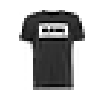

In [4]:
import matplotlib.pyplot as plt
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols*1.3, n_rows*1.2))
i = 0
for r in range(n_rows):
    for c in range(n_cols):
        i += 1
        plt.subplot(n_rows, n_cols, i)
        plt.imshow(X_train[i], cmap='binary', interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[i]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Creating a Model with Sequential API


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer

tf.random.set_seed(3)
model = Sequential()
model.add(InputLayer(input_shape=(28, 28)))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [115]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 300)               235500    
                                                                 
 dense_25 (Dense)            (None, 100)               30100     
                                                                 
 dense_26 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.activations import softmax, relu
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation=relu),
    Dense(100, activation=relu),
    Dense(10, activation=softmax)
])

In [117]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


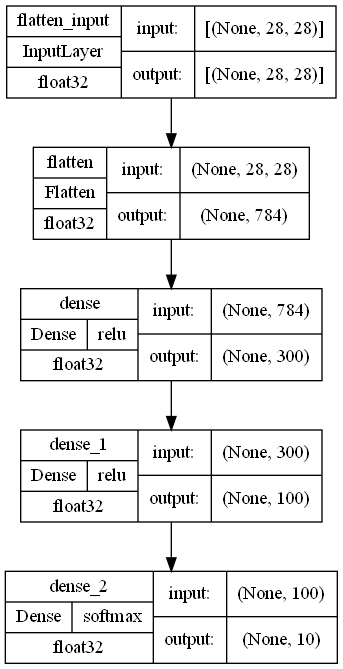

In [118]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True,
                          show_layer_activations=True, show_layer_names=True)

In [119]:
model.layers

In [120]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [121]:
model.get_layer('dense') is hidden1

True

In [122]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.06995015,  0.04114983,  0.07128352, ...,  0.02947556,
        -0.06137232, -0.00528669],
       [-0.00838938,  0.03008445,  0.03188126, ...,  0.0111163 ,
        -0.07044537, -0.06373099],
       [ 0.02381635, -0.01460785, -0.00981675, ...,  0.02757901,
        -0.0692351 ,  0.00687566],
       ...,
       [ 0.05921054, -0.03560367, -0.06568803, ...,  0.01032068,
         0.04483328,  0.01042698],
       [ 0.05800413,  0.01284763,  0.01555669, ..., -0.05624226,
         0.0620064 ,  0.0262538 ],
       [-0.00830625,  0.04870666,  0.00303472, ...,  0.04209414,
         0.07348573,  0.01298487]], dtype=float32)

In [123]:
weights.shape

(784, 300)

In [124]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', metrics=['accuracy'])

# equivalent:

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(), metrics=tf.keras.metrics.sparse_categorical_accuracy)

In [125]:
onehot = tf.keras.utils.to_categorical(
    [0, 4, 5, 9], num_classes=10)  # convert to one hot representation
sparse = np.argmax(onehot, axis=1)  # convert back to class number
print(onehot, sparse)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] [0 4 5 9]


In [59]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7170 - sparse_categorical_accuracy: 0.7666 - val_loss: 0.5017 - val_sparse_categorical_accuracy: 0.8284
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4894 - sparse_categorical_accuracy: 0.8294 - val_loss: 0.4597 - val_sparse_categorical_accuracy: 0.8318
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4418 - sparse_categorical_accuracy: 0.8444 - val_loss: 0.4225 - val_sparse_categorical_accuracy: 0.8540
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4159 - sparse_categorical_accuracy: 0.8537 - val_loss: 0.3959 - val_sparse_categorical_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3952 - sparse_categorical_accuracy: 0.8608 - val_loss: 0.3928 - val_sparse_categorical_accuracy: 0.8616
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3791 - spars

In [61]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [63]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


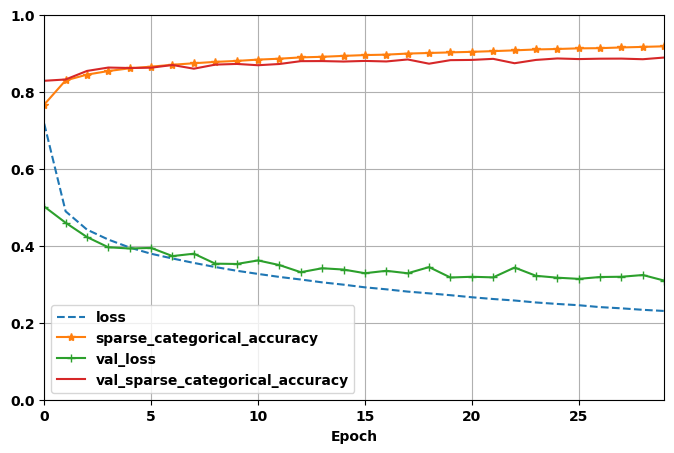

In [72]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=['--', '*-', '+-'])
plt.legend(loc="lower left")  # extra code
plt.show()

In [73]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3248 - sparse_categorical_accuracy: 0.8870


[0.3248309791088104, 0.8870000243186951]

In [87]:
X_new = X_test[:3]
y_propa = model.predict(X_new)
print(y_propa)
print("predicted classes", np.argmax(y_propa, axis=1))
print("predicted classes names :", np.array(
    class_names)[np.argmax(y_propa, axis=1)])

1/1 [==============================] - 0s 19ms/step
[[1.8529166e-05 9.3353140e-07 3.0758714e-05 1.8920839e-05 2.1755874e-05
  6.0590934e-03 3.4588065e-05 3.1707045e-02 3.8529994e-04 9.6172303e-01]
 [1.6438162e-04 1.0875410e-08 9.9290508e-01 3.1905522e-08 6.3772062e-03
  4.3248207e-11 5.5337476e-04 2.6519559e-12 1.9194883e-09 9.0680886e-11]
 [1.6361493e-05 9.9997938e-01 1.1900220e-07 3.5455485e-06 5.8256558e-07
  2.1557268e-11 6.1563846e-08 2.1710582e-09 3.7581485e-09 7.5814129e-12]]
predicted classes [9 2 1]
predicted classes names : ['Ankle boot' 'Pullover' 'Trouser']


### Common errors trial:


In [88]:
model.fit(X_train, y_valid, epochs=30, validation_data=(X_valid, y_valid))

ValueError: Data cardinality is ambiguous:
  x sizes: 55000
  y sizes: 5000
Make sure all arrays contain the same number of samples.

In [90]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_train))

Epoch 1/30
1719/1719 [==============================] - ETA: 0s - loss: 0.2244 - sparse_categorical_accuracy: 0.9189

ValueError: Data cardinality is ambiguous:
  x sizes: 5000
  y sizes: 55000
Make sure all arrays contain the same number of samples.

it doesn't showed that the error came from validation part


In [91]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='adam', metrics='accuracy')

# note the loss is set to be binary crossentropy which is false because this used on binary classification not multi-class as this case

In [92]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


ValueError: in user code:

    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 10) vs (None, 1)).


here's the error :
` ValueError: logits and labels must have the same shape, received ((None, 10) vs (None, 1)).`


In [94]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam', metrics='accuracy')
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


ValueError: in user code:

    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


let's try fix this error by modifying `y`


In [95]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam', metrics='accuracy')
model.fit(X_train, tf.keras.utils.to_categorical(y_train), epochs=2,
          validation_data=(X_valid, tf.keras.utils.to_categorical(y_valid)))

Epoch 1/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3728 - accuracy: 0.8638 - val_loss: 0.4074 - val_accuracy: 0.8466
Epoch 2/2
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3295 - accuracy: 0.8797 - val_loss: 0.3922 - val_accuracy: 0.8524


ok, it's worked.


let's try remove `Flatten` Layer:


In [102]:
model = Sequential([
    Dense(300, activation=relu, input_shape=[28, 28]),
    Dense(100, activation=relu),
    Dense(10, activation=softmax)
])

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam', metrics='accuracy')
model.fit(X_train, tf.keras.utils.to_categorical(y_train), epochs=2,
          validation_data=(X_valid, tf.keras.utils.to_categorical(y_valid)))

Epoch 1/2


ValueError: in user code:

    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\sayed\anaconda3\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10) and (None, 28, 10) are incompatible


In [9]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [10]:
X_train.shape

(11610, 8)

In [134]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = Sequential([
    norm_layer,
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='linear')  # output : no activation
])

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['RootMeanSquaredError'])

norm_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 1.0022 - root_mean_squared_error: 1.0011 - val_loss: 0.9212 - val_root_mean_squared_error: 0.9598
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3932 - root_mean_squared_error: 0.6270 - val_loss: 0.3476 - val_root_mean_squared_error: 0.5896
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3581 - root_mean_squared_error: 0.5984 - val_loss: 0.9974 - val_root_mean_squared_error: 0.9987
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3548 - root_mean_squared_error: 0.5956 - val_loss: 0.9764 - val_root_mean_squared_error: 0.9881
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3350 - root_mean_squared_error: 0.5788 - val_loss: 0.3657 - val_root_mean_squared_error: 0.6047
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3250 - root_mean_squared_error: 0.5701 - val_loss: 1.0227 - val_

In [136]:
mse, rmse = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 49ms/step


array([[0.46420538],
       [1.135674  ],
       [4.8049026 ]], dtype=float32)

In [137]:
rmse

0.5276895761489868

## Building Complex Models Using the Functional API


In [6]:
from tensorflow.keras.layers import Dense

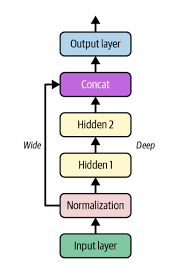


In [11]:
normalization_layer = tf.keras.layers.Normalization()
hidden1_layer = Dense(30, activation='relu')
hidden2_layer = Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden1_layer(normalized)
hidden2 = hidden2_layer(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [12]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 normalization_2 (Normalization  (None, 8)           17          ['input_2[0][0]']                
 )                                                                                                
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['normalization_2[0][0]']        
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']          

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss = 'mse'
metrics = ['RootMeanSquaredError']

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [15]:
normalization_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 4s 4ms/step - loss: 1.4168 - root_mean_squared_error: 1.1903 - val_loss: 7.7744 - val_root_mean_squared_error: 2.7883
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5053 - root_mean_squared_error: 0.7109 - val_loss: 0.6134 - val_root_mean_squared_error: 0.7832
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3938 - root_mean_squared_error: 0.6275 - val_loss: 0.4379 - val_root_mean_squared_error: 0.6617
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3734 - root_mean_squared_error: 0.6111 - val_loss: 0.4190 - val_root_mean_squared_error: 0.6473
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3612 - root_mean_squared_error: 0.6010 - val_loss: 0.3407 - val_root_mean_squared_error: 0.5837
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3535 - root_mean_squared_error: 0.5946 - val_loss: 0.4288 - val_

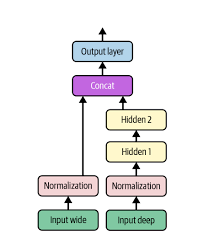


What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).


In [32]:
input_wide = tf.keras.layers.Input(shape=[5], name='input_wide')
input_deep = tf.keras.layers.Input(shape=[6], name='input_deep')

normalization_deep = tf.keras.layers.Normalization(name='normalization_deep')
normalization_wide = tf.keras.layers.Normalization(name='normalization_wide')

norm_deep = normalization_deep(input_deep)
norm_wide = normalization_wide(input_wide)

hidden1 = tf.keras.layers.Dense(
    30, activation='relu', name='hidden1_deep')(norm_deep)
hidden2 = tf.keras.layers.Dense(
    30, activation='relu', name='hidden2_deep')(hidden1)

concat = tf.keras.layers.Concatenate(name='concat')([norm_wide, hidden2])
output = Dense(1, activation='linear', name='output')(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [33]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_deep (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 normalization_deep (Normalizat  (None, 6)           13          ['input_deep[0][0]']             
 ion)                                                                                             
                                                                                                  
 input_wide (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 hidden1_deep (Dense)           (None, 30)           210         ['normalization_deep[0][0]'

In [34]:
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

X_train_deep, X_train_wide = X_train[:, 2:], X_train[:, :5]
X_valid_deep, X_valid_wide = X_valid[:, 2:], X_valid[:, :5]
X_test_deep, X_test_wide = X_test[:, 2:], X_test[:, :5]
X_new_deep, X_new_wide = X_test[:3, 2:], X_test[:3, :5]


normalization_wide.adapt(X_train_wide)
normalization_deep.adapt(X_train_deep)

# history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
#                     validation_data=((X_valid_wide, X_valid_deep), y_valid))

history = model.fit({'input_wide': X_train_wide, 'input_deep': X_train_deep}, y_train, epochs=20,
                    validation_data=({'input_wide': X_valid_wide, 'input_deep': X_valid_deep}, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6410 - root_mean_squared_error: 0.8006 - val_loss: 0.4450 - val_root_mean_squared_error: 0.6671
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4143 - root_mean_squared_error: 0.6436 - val_loss: 1.1775 - val_root_mean_squared_error: 1.0851
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4089 - root_mean_squared_error: 0.6395 - val_loss: 0.7493 - val_root_mean_squared_error: 0.8656
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3949 - root_mean_squared_error: 0.6284 - val_loss: 0.4526 - val_root_mean_squared_error: 0.6727
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3854 - root_mean_squared_error: 0.6208 - val_loss: 0.3606 - val_root_mean_squared_error: 0.6005
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3788 - root_mean_squared_error: 0.6155 - val_loss: 0.3853 - val_

In [37]:
mse_test = model.evaluate(
    {'input_wide': X_test_wide, 'input_deep': X_test_deep}, y_test)
y_pred = model.predict({'input_wide': X_new_wide, 'input_deep': X_new_deep})
print(mse_test)
print(y_pred)

1/1 [==============================] - 0s 16ms/step
[0.3376445472240448, 0.5810719132423401]
[[0.42338794]
 [1.1275091 ]
 [3.9657369 ]]


let's try with multiple outputs..


In [38]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [52]:
input_wide = tf.keras.layers.Input(shape=[5], name='input_wide')
input_deep = tf.keras.layers.Input(shape=[6], name='input_deep')

normalization_deep = tf.keras.layers.Normalization(name='normalization_deep')
normalization_wide = tf.keras.layers.Normalization(name='normalization_wide')

norm_deep = normalization_deep(input_deep)
norm_wide = normalization_wide(input_wide)

hidden1 = tf.keras.layers.Dense(
    30, activation='relu', name='hidden1_deep')(norm_deep)
hidden2 = tf.keras.layers.Dense(
    30, activation='relu', name='hidden2_deep')(hidden1)

concat = tf.keras.layers.Concatenate(name='concat')([norm_wide, hidden2])
output_main = Dense(1, activation='linear', name='output_main')(concat)
output_aux = Dense(1, activation='linear', name='output_aux')(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[
                       output_main, output_aux])

In [53]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_deep (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 normalization_deep (Normalizat  (None, 6)           13          ['input_deep[0][0]']             
 ion)                                                                                             
                                                                                                  
 input_wide (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 hidden1_deep (Dense)           (None, 30)           210         ['normalization_deep[0][0]'

In [54]:
model.compile(loss={'output_main': 'mse', 'output_aux': 'mae'}, optimizer=optimizer,
              loss_weights={'output_main': .8, 'output_aux': .2}, metrics=metrics)

In [55]:
normalization_wide.adapt(X_train_wide)
normalization_deep.adapt(X_train_deep)

history = model.fit({'input_wide': X_train_wide, 'input_deep': X_train_deep}, (y_train, y_train), epochs=20,
                    validation_data=({'input_wide': X_valid_wide, 'input_deep': X_valid_deep}, (y_valid, y_valid)))

Epoch 1/20
363/363 [==============================] - 3s 7ms/step - loss: 0.6703 - output_main_loss: 0.6695 - output_aux_loss: 0.6735 - output_main_root_mean_squared_error: 0.8182 - output_aux_root_mean_squared_error: 0.9719 - val_loss: 0.9659 - val_output_main_loss: 1.0696 - val_output_aux_loss: 0.5514 - val_output_main_root_mean_squared_error: 1.0342 - val_output_aux_root_mean_squared_error: 0.8656
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4417 - output_main_loss: 0.4165 - output_aux_loss: 0.5425 - output_main_root_mean_squared_error: 0.6454 - output_aux_root_mean_squared_error: 0.7643 - val_loss: 0.4415 - val_output_main_loss: 0.4157 - val_output_aux_loss: 0.5447 - val_output_main_root_mean_squared_error: 0.6448 - val_output_aux_root_mean_squared_error: 0.7726
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4273 - output_main_loss: 0.4022 - output_aux_loss: 0.5279 - output_main_root_mean_squared_error: 0.6342 - output_aux

In [44]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 1s 5ms/step - loss: 0.3302 - output_main_loss: 0.3242 - output_aux_loss: 0.3841 - output_main_root_mean_squared_error: 0.5694 - output_aux_root_mean_squared_error: 0.6197


In [45]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 104ms/step


In [46]:
y_pred_main, y_pred_aux

(array([[0.56568956],
        [1.1642805 ],
        [3.4986207 ]], dtype=float32),
 array([[0.60030943],
        [1.0811226 ],
        [3.256943  ]], dtype=float32))

In [48]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 [==============================] - 0s 18ms/step


{'output_main': array([[0.56568956],
        [1.1642805 ],
        [3.4986207 ]], dtype=float32),
 'output_aux': array([[0.60030943],
        [1.0811226 ],
        [3.256943  ]], dtype=float32)}

## Using the Subclassing API to Build Dynamic Models

In [56]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.normalization_wide = tf.keras.layers.Normalization()
        self.normalization_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation)
        self.output_main = tf.keras.layers.Dense(1)
        self.output_aux = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.normalization_wide(input_wide)
        norm_deep = self.normalization_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output_main = self.output_main(concat)
        output_aux = self.output_aux(hidden2)
        return output_main, output_aux


tf.random.set_seed(32)
model = WideAndDeepModel(30, activation='relu', name='wide_deep_model')

In [59]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

model.normalization_wide.adapt(X_train_wide)
model.normalization_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 [==============================] - 3s 6ms/step - loss: 1.3228 - output_1_loss: 1.2564 - output_2_loss: 1.9210 - output_1_root_mean_squared_error: 1.1209 - output_2_root_mean_squared_error: 1.3860 - val_loss: 1.2482 - val_output_1_loss: 1.0736 - val_output_2_loss: 2.8192 - val_output_1_root_mean_squared_error: 1.0362 - val_output_2_root_mean_squared_error: 1.6791
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5146 - output_1_loss: 0.4862 - output_2_loss: 0.7708 - output_1_root_mean_squared_error: 0.6973 - output_2_root_mean_squared_error: 0.8780 - val_loss: 1.4434 - val_output_1_loss: 1.3592 - val_output_2_loss: 2.2016 - val_output_1_root_mean_squared_error: 1.1658 - val_output_2_root_mean_squared_error: 1.4838
Epoch 3/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4468 - output_1_loss: 0.4258 - output_2_loss: 0.6365 - output_1_root_mean_squared_error: 0.6525 - output_2_root_mean_squared_error: 0.7978 - val_loss: 0.457

## Saving and Restoring a Model

In [62]:
import shutil
from pathlib import Path

shutil.rmtree('my_keras_model', ignore_errors=True)

In [63]:
model.save('my_keras_model', save_format='tf')

INFO:tensorflow:Assets written to: my_keras_model\assets


In [64]:
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model\assets
my_keras_model\keras_metadata.pb
my_keras_model\saved_model.pb
my_keras_model\variables
my_keras_model\variables\variables.data-00000-of-00001
my_keras_model\variables\variables.index


In [66]:
loaded_model = tf.keras.models.load_model('my_keras_model')
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
y_pred_main, y_pred_aux

1/1 [==============================] - 0s 16ms/step


(array([[0.4875873],
        [1.5066742],
        [3.5481503]], dtype=float32),
 array([[0.643222 ],
        [1.8706505],
        [3.1931453]], dtype=float32))

In [67]:
model.save_weights("my_weights")

In [68]:
model.load_weights("my_weights")

In [69]:
for path in sorted(Path().glob("my_weights.*")):
    print(path)

my_weights.data-00000-of-00001
my_weights.index


## Using Callbacks

In [72]:
shutil.rmtree("my_checkpoints", ignore_errors=True)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 6ms/step - loss: 0.3714 - output_1_loss: 0.3609 - output_2_loss: 0.4661 - output_1_root_mean_squared_error: 0.6008 - output_2_root_mean_squared_error: 0.6827 - val_loss: 0.4684 - val_output_1_loss: 0.4478 - val_output_2_loss: 0.6536 - val_output_1_root_mean_squared_error: 0.6692 - val_output_2_root_mean_squared_error: 0.8085
Epoch 2/10
363/363 [==============================] - 2s 6ms/step - loss: 0.3658 - output_1_loss: 0.3557 - output_2_loss: 0.4567 - output_1_root_mean_squared_error: 0.5964 - output_2_root_mean_squared_error: 0.6758 - val_loss: 0.4236 - val_output_1_loss: 0.4061 - val_output_2_loss: 0.5813 - val_output_1_root_mean_squared_error: 0.6373 - val_output_2_root_mean_squared_error: 0.7625
Epoch 3/10
363/363 [==============================] - 2s 6ms/step - loss: 0.3639 - output_1_loss: 0.3544 - output_2_loss: 0.4498 - output_1_root_mean_squared_error: 0.5953 - output_2_root_mean_squared_error: 0.6707 - val_loss: 0.352

In [73]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 2s 7ms/step - loss: 0.3501 - output_1_loss: 0.3430 - output_2_loss: 0.4143 - output_1_root_mean_squared_error: 0.5856 - output_2_root_mean_squared_error: 0.6436 - val_loss: 0.5162 - val_output_1_loss: 0.4968 - val_output_2_loss: 0.6905 - val_output_1_root_mean_squared_error: 0.7048 - val_output_2_root_mean_squared_error: 0.8310
Epoch 2/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3436 - output_1_loss: 0.3363 - output_2_loss: 0.4090 - output_1_root_mean_squared_error: 0.5799 - output_2_root_mean_squared_error: 0.6395 - val_loss: 0.3549 - val_output_1_loss: 0.3441 - val_output_2_loss: 0.4519 - val_output_1_root_mean_squared_error: 0.5866 - val_output_2_root_mean_squared_error: 0.6722
Epoch 3/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3438 - output_1_loss: 0.3366 - output_2_loss: 0.4087 - output_1_root_mean_squared_error: 0.5802 - output_2_root_mean_squared_error: 0.6393 - val_loss: 0.

In [74]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")


val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=0.97
Epoch=1, val/train=2.02
Epoch=2, val/train=2.33
Epoch=3, val/train=2.10
Epoch=4, val/train=6.52
Epoch=5, val/train=3.91
Epoch=6, val/train=1.37
Epoch=7, val/train=2.07
Epoch=8, val/train=0.94
Epoch=9, val/train=1.73


## Using TensorBoard for Visualization